In [1]:
# Simulating a Moving Mouse

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pylab #for some reason saving figures causes the graphs to be messed up (just the matplotlib window gets smaller)
from numpy.random import normal as normal


In [4]:
animal_length=50
animal_ear_width=5
animal_height=20
ear_nose_distance=10
simulation_length=10000
fps=90
num_poses=3
num_keypoints=5
pose_states=np.asarray(range(3))

In [5]:
# row determines current state, cloumn determines state to transition to
# diagonal values are the probabilities of staying in the same state
transition_matrix=[[.99,.009,.001], #walking to walk, rear, groom
                   [.09,.90,.01], #rearing to walk, rear, groom
                   [.03,.02,.95]] #grooming to walk, rear, groom

In [6]:
#key points

com=[0,0,animal_height/2]
left_ear=[]
right_ear=[]
nose=[]
tail_base=[]


In [7]:
animal=np.zeros((5,3),dtype=float)

In [8]:
def earnoise():
    earnoise=random.random()
    return earnoise

In [9]:
def nosenoise():
    nosenoise=random.random()-random.random()
    return nosenoise

In [10]:
def tailbasenoise():
    tailbasenoise=random.random()-random.random()
    return tailbasenoise

In [11]:
def walk(animal,com):
    animal[0]=com
    animal[1]=[com[0]-animal_ear_width/2-earnoise(),com[1]+animal_length/2-ear_nose_distance+earnoise(),com[2]+earnoise()]
    animal[2]=[com[0]+animal_ear_width/2+earnoise(),com[1]+animal_length/2-ear_nose_distance+earnoise(),com[2]+earnoise()]
    animal[3]=[com[0]+nosenoise(),com[1]+animal_length/2+nosenoise(),com[2]+nosenoise()]
    animal[4]=[com[0]+tailbasenoise(),com[1]-animal_length/2+tailbasenoise(),com[2]+tailbasenoise()]

    return animal.astype(float)        

In [12]:
def rear(animal,com):
    animal[0]=com
    animal[1]=[com[0]-animal_ear_width/2-earnoise(),com[1]+earnoise(),animal_length-ear_nose_distance+earnoise()]
    animal[2]=[com[0]+animal_ear_width/2+earnoise(),com[1]+earnoise(),animal_length-ear_nose_distance+earnoise()]
    animal[3]=[com[0]+nosenoise(),com[1]+nosenoise(),animal_length+nosenoise()]
    animal[4]=[com[0]+tailbasenoise(),com[1]+tailbasenoise(),tailbasenoise()]

    return animal.astype(float) 

In [13]:
def groom(animal,com):
    animal[0]=com
    animal[1]=[com[0]-animal_ear_width/2-earnoise(),com[1]+animal_length/4+earnoise()*2,com[2]+earnoise()]
    animal[2]=[com[0]+animal_ear_width/2+earnoise(),com[1]+animal_length/4+earnoise()*2,com[2]+earnoise()]
    animal[3]=[com[0]+nosenoise(),com[1]+animal_length/4+nosenoise()*2,com[2]-ear_nose_distance/4+nosenoise()]
    animal[4]=[com[0]+tailbasenoise(),com[1]-animal_length/4+tailbasenoise(),com[2]/2+tailbasenoise()]

    return animal.astype(float) 

In [14]:
def find_interval(x, partition):
    """ find_interval -> i
        partition is a sequence of numerical values
        x is a numerical value
        The return value "i" will be the index for which applies
        partition[i] < x < partition[i+1], if such an index exists.
        -1 otherwise
    """
    
    for i in range(0, len(partition)):
        if x < partition[i]:
            return i-1
    return -1

In [15]:
#writing a function where the input is a transition matrix and the output is a sequence of a given length 

def makeseq(states,transition_matrix,seq_length,starting_state=0):
    state=starting_state
    seq=[]
    for n in range(seq_length):
        toss=np.random.random()
        weights=transition_matrix[state]
        cum_weights = [0] + list(np.cumsum(weights))
        index = find_interval(toss, cum_weights)
        seq.append(states[index])
        state=states[index]
    return np.asarray(seq)

In [16]:
def autocorr(x,lag):
    roll=np.roll(x,lag)
    result = np.correlate(x, roll, mode='full')
    return result

In [17]:
def myplot(i, x, y, z):
    scat.set_data(x[i], y[i])
    scat.set_3d_properties(z[i])

In [18]:
'''
###

#The simplest simulation: there is a 10% chance the animal which switch its pose

mouse_experiment=np.zeros((simulation_length,num_keypoints,num_poses),dtype=float)
poses=np.zeros(simulation_length,dtype=int)
states=np.zeros(simulation_length,dtype=int)
pose=1

for x in range(simulation_length):
    toss=random.random()
    state=random.randint(1,3)
    #change state (hidden)
    if toss>=.1 and pose==1:
        mouse_experiment[x]=walk(animal,com)
    if toss>=.01 and pose==2:
        mouse_experiment[x]=rear(animal,com)
    if toss>=.001 and pose==3:
        mouse_experiment[x]=groom(animal,com)
    #change pose (seen)
    if toss<.1 and state==1:
        mouse_experiment[x]=walk(animal,com)
        pose=1
    if toss<.01 and state==2:
        mouse_experiment[x]=rear(animal,com)
        pose=2
    if toss<.001 and state==3:
        mouse_experiment[x]=groom(animal,com)
        pose=3
    poses[x]=pose
    states[x]=state
    print(pose)
    
###
'''

'\n###\n\n#The simplest simulation: there is a 10% chance the animal which switch its pose\n\nmouse_experiment=np.zeros((simulation_length,num_keypoints,num_poses),dtype=float)\nposes=np.zeros(simulation_length,dtype=int)\nstates=np.zeros(simulation_length,dtype=int)\npose=1\n\nfor x in range(simulation_length):\n    toss=random.random()\n    state=random.randint(1,3)\n    #change state (hidden)\n    if toss>=.1 and pose==1:\n        mouse_experiment[x]=walk(animal,com)\n    if toss>=.01 and pose==2:\n        mouse_experiment[x]=rear(animal,com)\n    if toss>=.001 and pose==3:\n        mouse_experiment[x]=groom(animal,com)\n    #change pose (seen)\n    if toss<.1 and state==1:\n        mouse_experiment[x]=walk(animal,com)\n        pose=1\n    if toss<.01 and state==2:\n        mouse_experiment[x]=rear(animal,com)\n        pose=2\n    if toss<.001 and state==3:\n        mouse_experiment[x]=groom(animal,com)\n        pose=3\n    poses[x]=pose\n    states[x]=state\n    print(pose)\n    \n

In [19]:
#Better simulation: using transition matrix

mouse_experiment=np.zeros((simulation_length,num_keypoints,num_poses),dtype=float)
poses=makeseq(np.asarray(range(3)),transition_matrix,simulation_length)
for n in range(simulation_length):
    if poses[n]==0:
        mouse_experiment[n]=walk(animal,com)
    if poses[n]==1:
        mouse_experiment[n]=rear(animal,com)
    if poses[n]==2:
        mouse_experiment[n]=groom(animal,com)



<IPython.core.display.Javascript object>


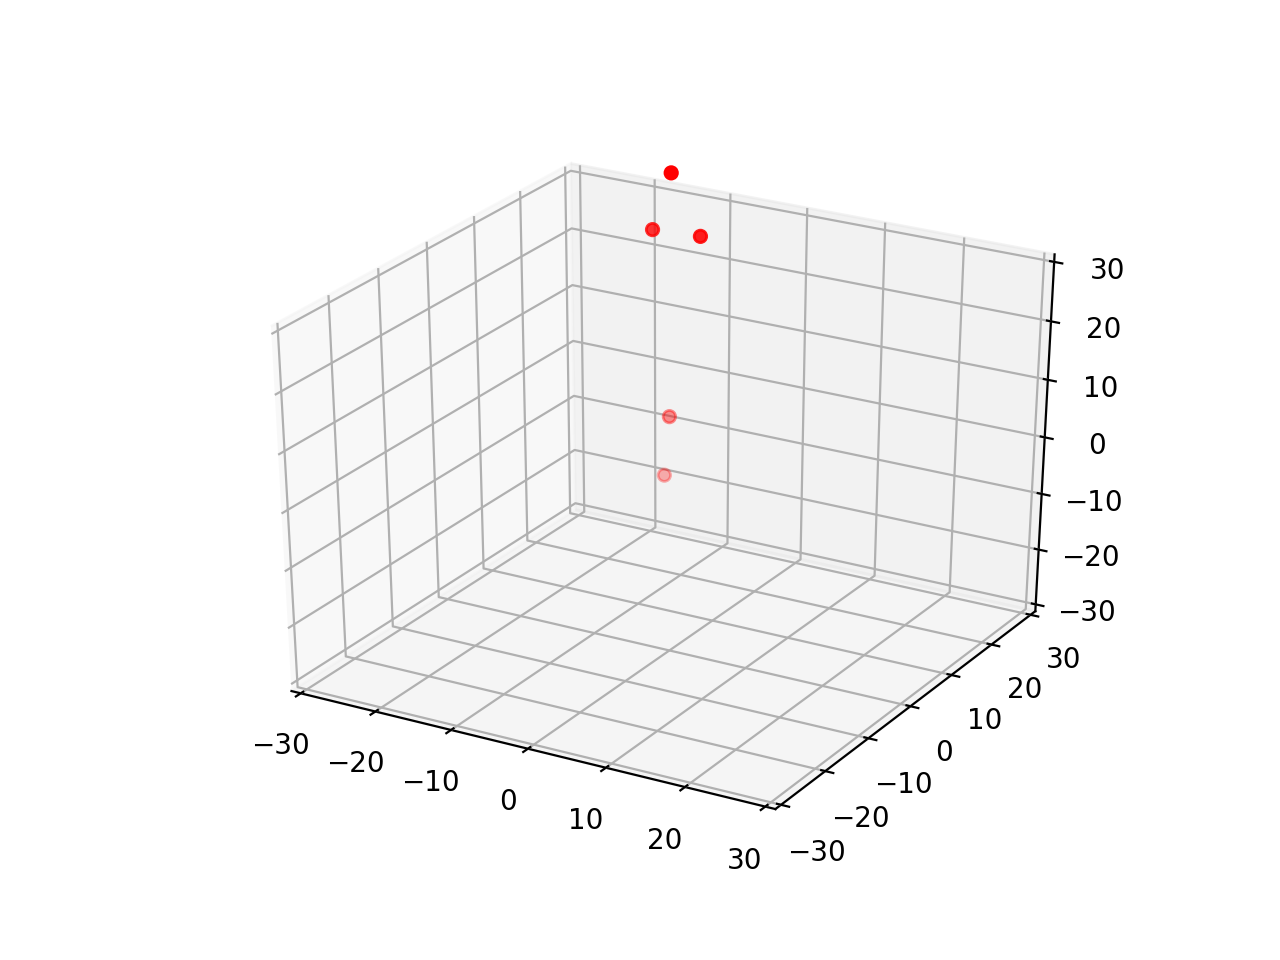

In [33]:
frame=500

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =mouse_experiment[frame,:,0]
y =mouse_experiment[frame,:,1]
z =mouse_experiment[frame,:,2]

ax.set_xlim3d(-30, 30)
ax.set_ylim3d(-30, 30)
ax.set_zlim3d(-30, 30)



ax.scatter(x, y, z, c='r', marker='o')
plt.show()

In [21]:
#pylab.savefig('virtualmouse_walking.png')

<IPython.core.display.Javascript object>


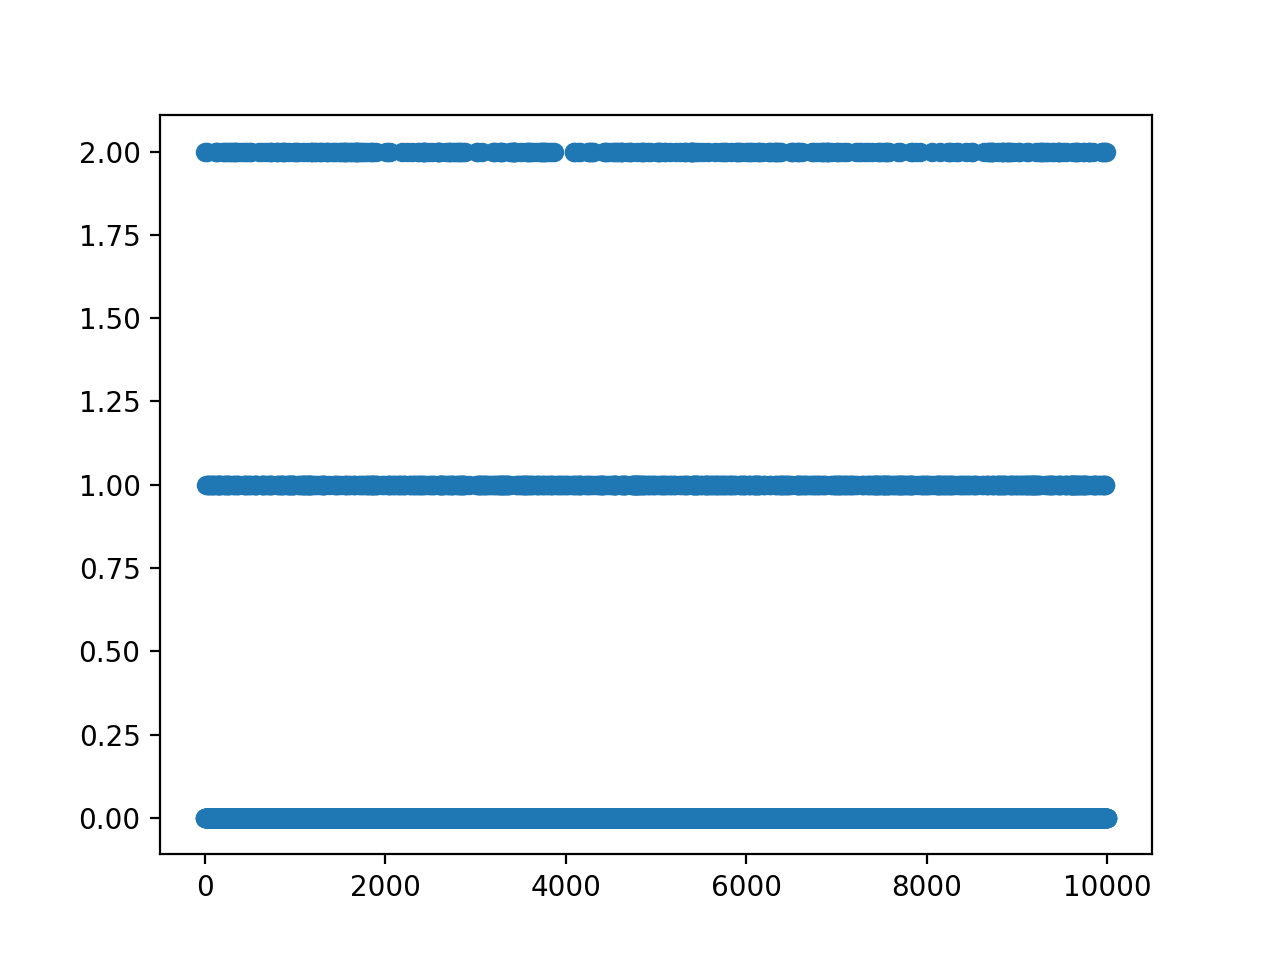

In [32]:
poses_autocorr=autocorr(poses,0)
pa=poses_autocorr[0:int((poses_autocorr.size +1 )/2)] #if i don't do this the autocorrelation list is twice as long as simulation length
#plotting autocorrelation vs poses

fig=plt.figure()
ax=fig.add_subplot(111)
#ax.plot(range(simulation_length),pa)
ax.scatter(range(poses.size),poses)
plt.show()

In [23]:
#pylab.savefig('virtualmouse_behaviors.png')

<IPython.core.display.Javascript object>


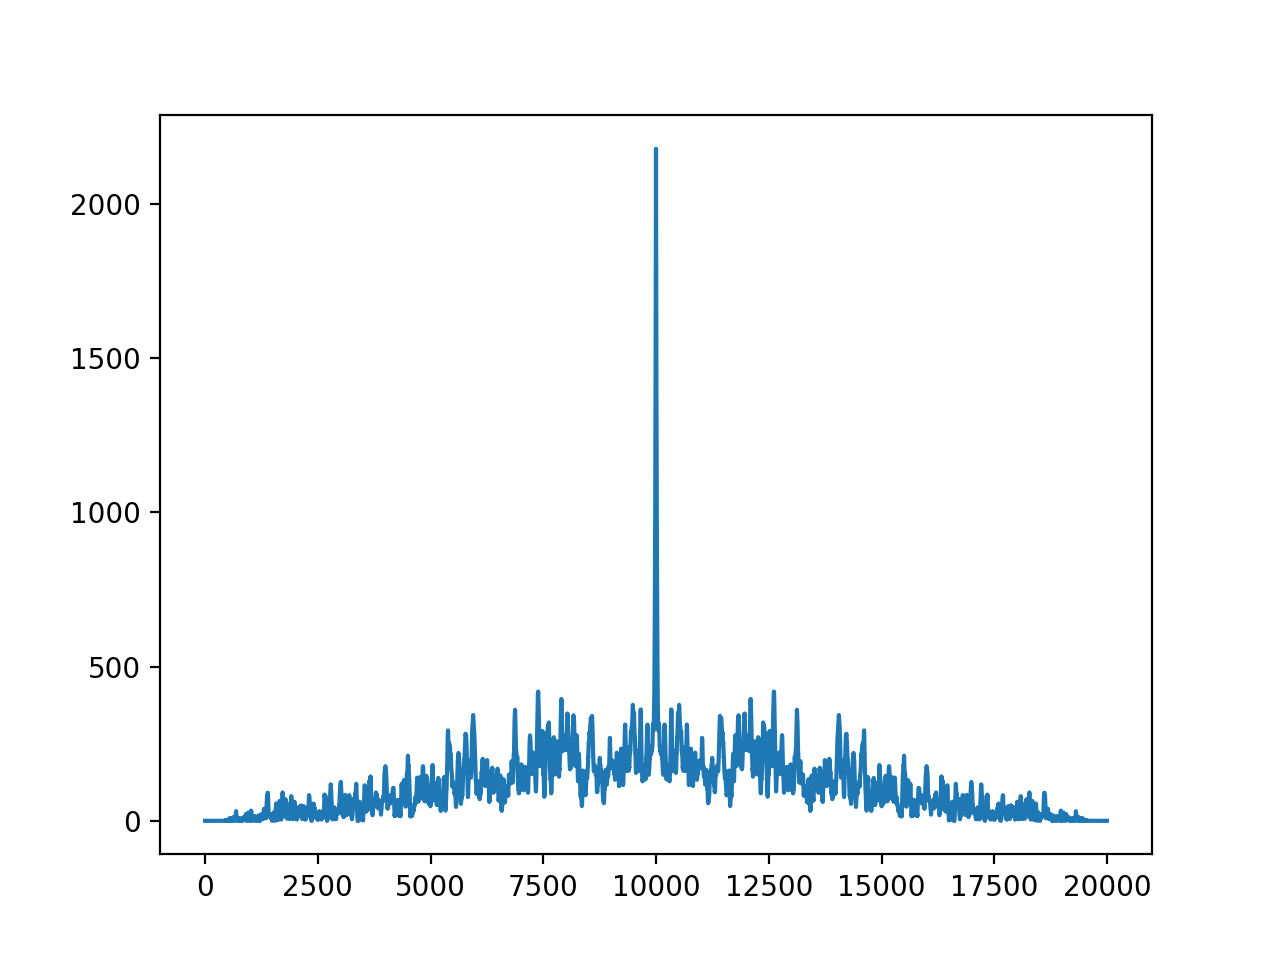

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(poses_autocorr.size),poses_autocorr)
plt.show()

In [25]:
#pylab.savefig('cumulative_autocorrelation.png')

<IPython.core.display.Javascript object>


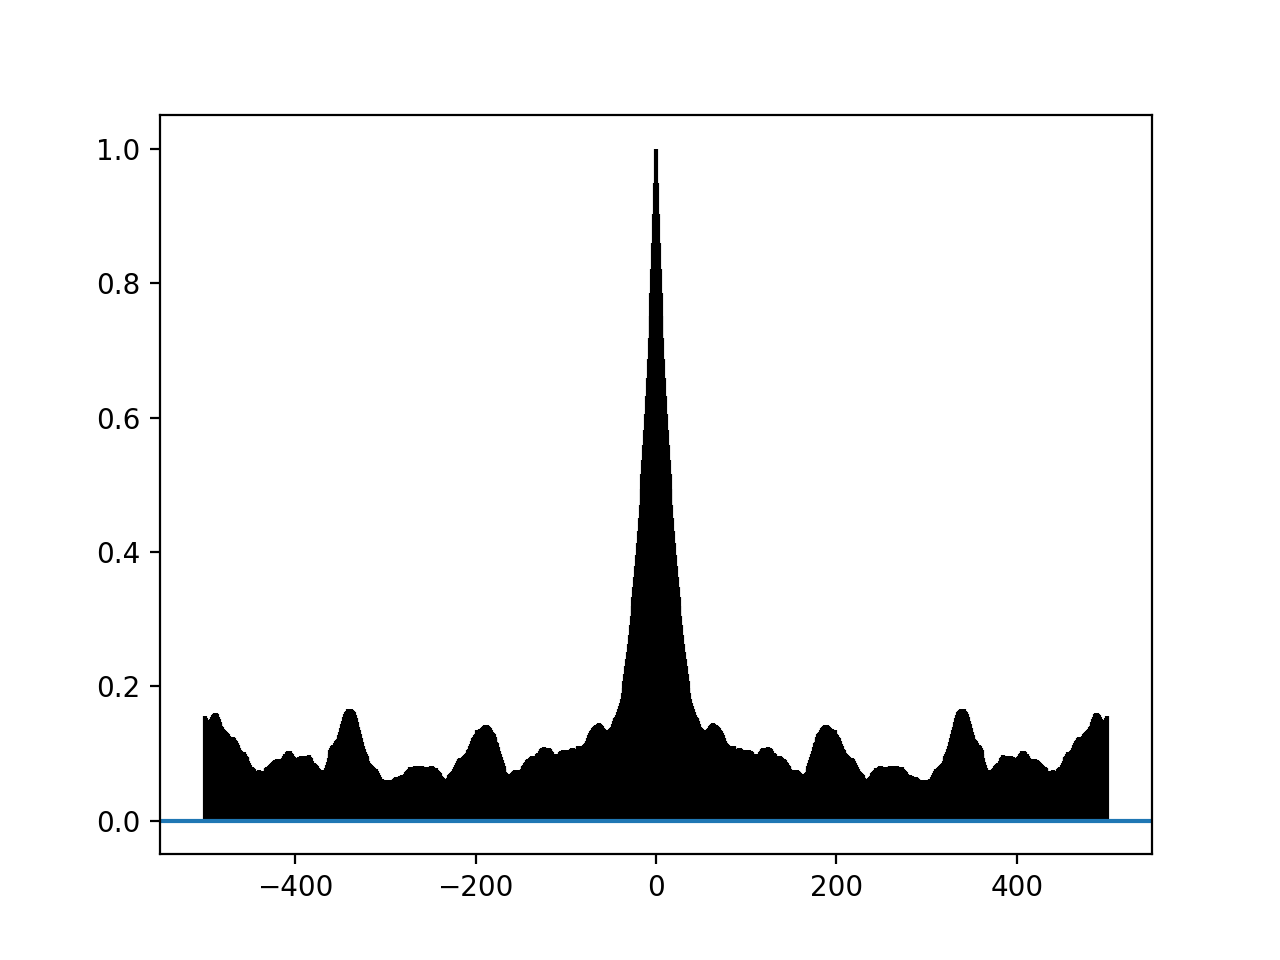

In [29]:
#autocorrelation of expressed poses
fig=plt.figure()
ax=fig.add_subplot(111)
plt.acorr(poses.astype('float'),maxlags=500)
plt.show()

In [27]:
#pylab.savefig('autocorrelation.png')

<IPython.core.display.Javascript object>


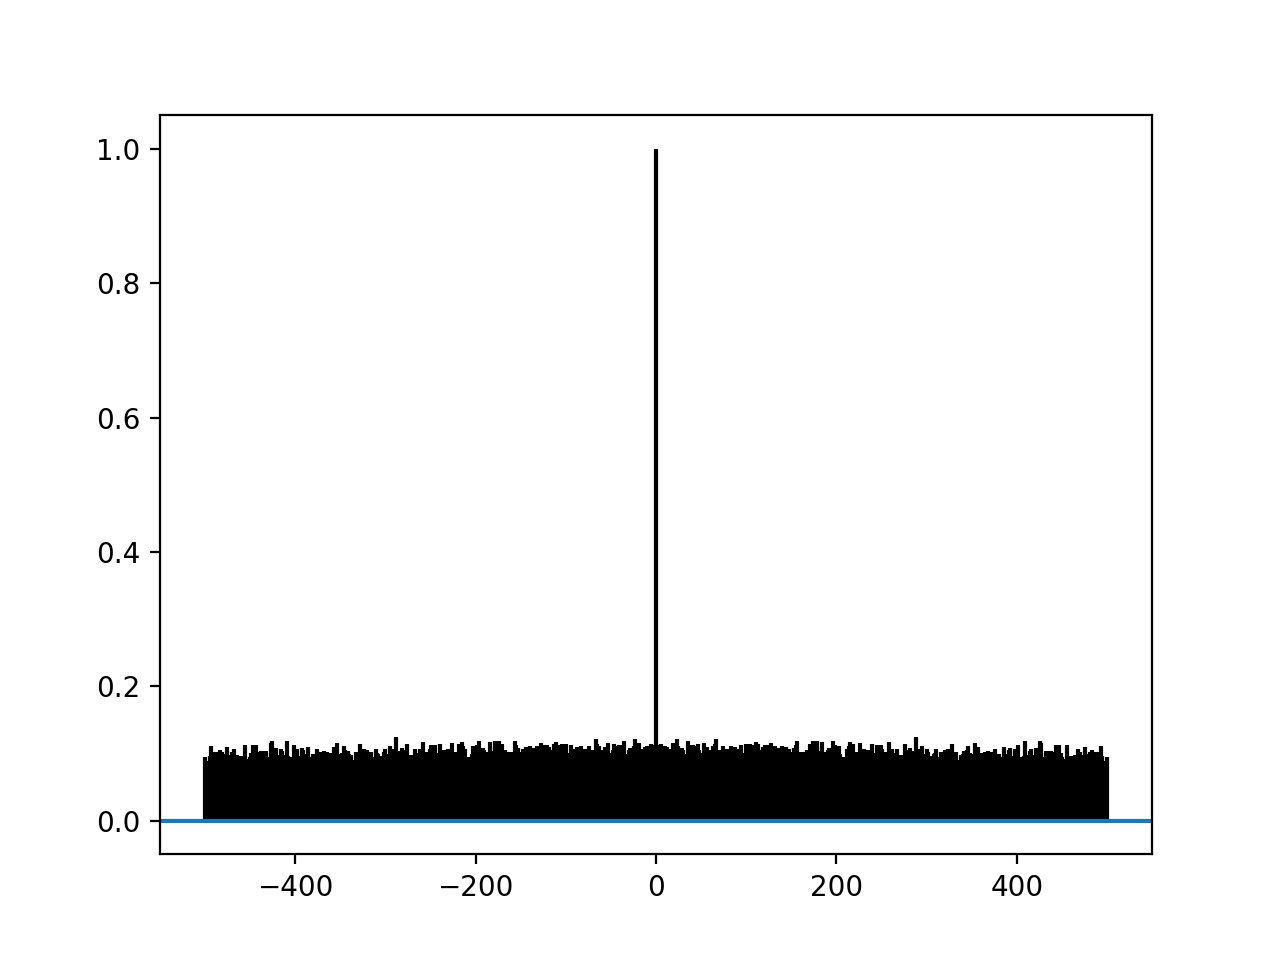

In [30]:
shuffled=poses
np.random.shuffle(shuffled)

#autocorrelation of shuffled
fig=plt.figure()
ax=fig.add_subplot(111)
plt.acorr(shuffled.astype('float'),maxlags=500)
plt.show()

In [ ]:
#pylab.savefig('shuffled_autocorrelation.png')

<IPython.core.display.Javascript object>


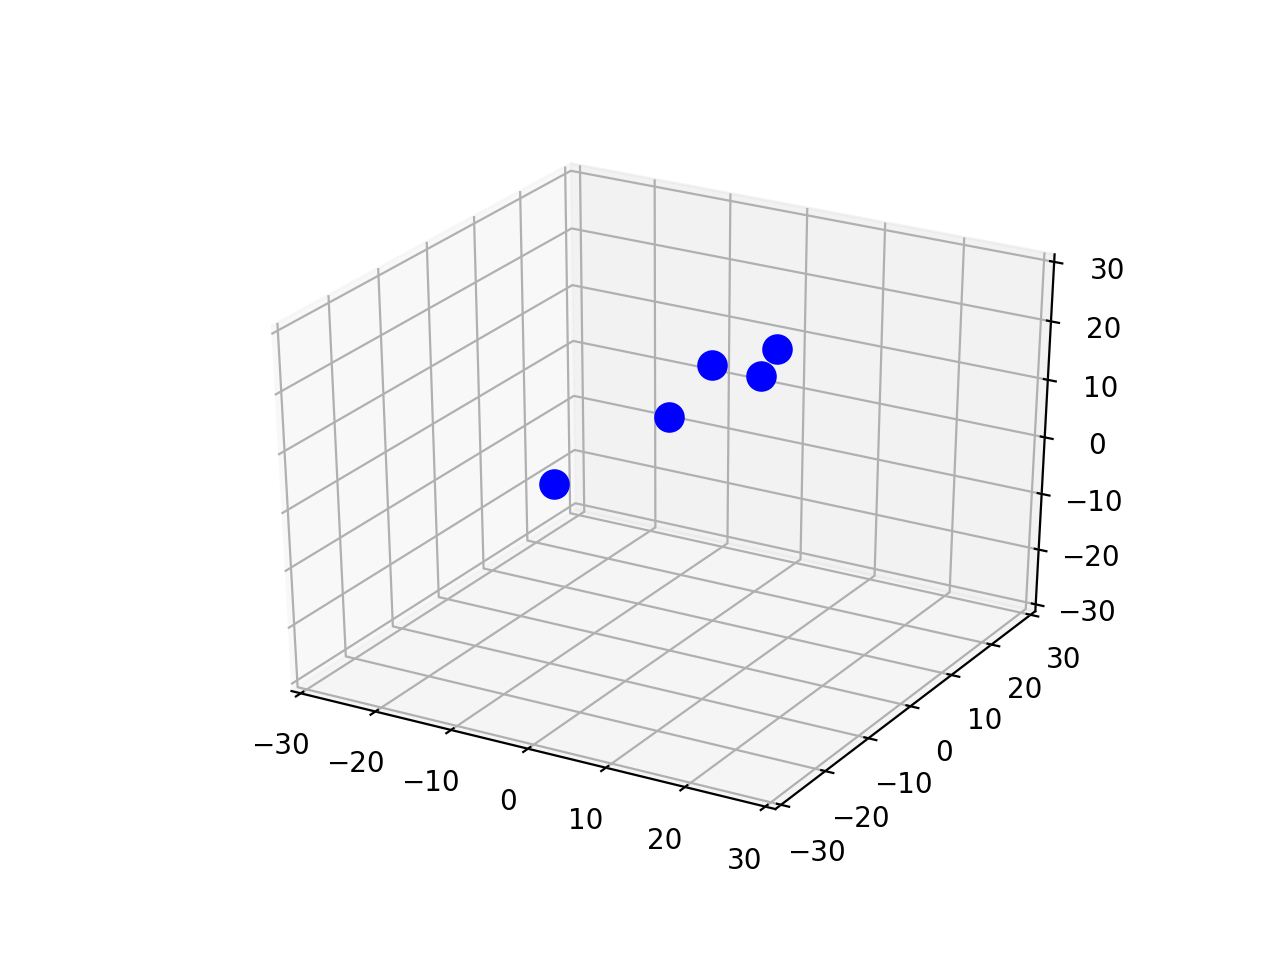

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scat, =ax.plot([], [], [], c='b', marker="o", markersize=10, linestyle='none')

#x =mouse_experiment[frame,:,0]
#y =mouse_experiment[frame,:,1]
#z =mouse_experiment[frame,:,2]

x =mouse_experiment[:,:,0]
y =mouse_experiment[:,:,1]
z =mouse_experiment[:,:,2]

ax.set_xlim3d(-30, 30)
ax.set_ylim3d(-30, 30)
ax.set_zlim3d(-30, 30)



ani = animation.FuncAnimation(fig, myplot, simulation_length, fargs=(x,y,z), interval=100/fps, repeat=True, blit=False)
plt.show()



In [ ]:
#saving the animation

#ani.save('Desktop/virtual_mouse.mp4', writer="ffmpeg")

In [ ]:
'''
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.75, fc='y')

def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 5 + 3 * np.sin(np.radians(i))
    y = 5 + 3 * np.cos(np.radians(i))
    patch.center = (x, y)
    return patch,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=20,
                               blit=True)

plt.show()
'''

In [ ]:
'''
nfr = 30 # Number of frames
fps = 10 # Frame per sec
xs = []
ys = []
zs = []
ss = np.arange(1,nfr,0.5)
for s in ss:
    xs.append(normal(50,s,200))
    ys.append(normal(50,s,200))
    zs.append(normal(50,s,200))
'''

In [ ]:
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", markersize=2)
def update(ifrm, xa, ya, za):
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs), interval=1000/fps)
'''